In [3]:
import modal
from egfr_binder_rd2.utils import hash_seq
from egfr_binder_rd2 import EGFR, EGFS
import pandas as pd


In [4]:


get_msa = modal.Function.lookup("simplefold", 'get_msa_for_binder')
fold_binder = modal.Function.lookup("simplefold", 'fold_binder')
update_metrics = modal.Function.lookup("simplefold", 'update_metrics_for_all_folded')
esm2_pll = modal.Function.lookup("esm2-inference", 'process_sequences')
update_pll_metrics = modal.Function.lookup("esm2-inference", 'update_pll_metrics')
update_exact_pll_metrics = modal.Function.lookup("esm2-inference", 'update_exact_pll_metrics')


# get fasta to run bindcraft stuff

In [11]:
df = pd.read_csv('/home/naka/code/BindCraft/outputs/EGFR_single_domain/final_design_stats.csv')

In [12]:
df = df.sort_values('Average_i_pTM', ascending=False)

In [13]:
binder_seqs = {}
for i, row in df.iterrows():
    binder_seq = row['Sequence']
    complex = f'{binder_seq}:{EGFR}'
    binder_seqs[hash_seq(complex)] = complex


In [15]:
# Save sequences to FASTA
with open('bindcraft_seqs.fasta', 'w') as f:
    for seq_hash, complex_seq in binder_seqs.items():
        f.write(f'>{seq_hash}\n{complex_seq}\n')


# run pll on last rounds stuff

In [5]:
df = pd.read_csv('/home/naka/code/egfr_binder_rd2/data/fold_df.csv', index_col=0)

In [11]:
binder_seqs = df['binder_sequence'].to_list()

In [12]:
result = esm2_pll.remote(binder_seqs)

In [13]:
metrics = update_pll_metrics.remote()

# other

In [14]:
binder_seqs = [
    'WVQLQESGGGLVQPGGSLRLSCAASGRTFSSYAMGWFRQAPGKQREFVAAIRWSGGYTYYTDSVKGRFTISRDNAKTTVYLQMNSLKPEDTAVYYCAATYLSSDYSRYALPQRPLDYDYWGQGTQVTVSSLE:LEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEVVLGNLEITYVQRNYDLSFLKTIQEVAGYVLIALNTVERIPLENLQIIRGNMYYENSYALAVLSNYDANKTGLKELPMRNLQEILHGAVRFSNNPALCNVESIQWRDIVSSDFLSNMSMDFQNHLGSCQKCDPSCPNGSCWGAGEENCQKLTKIICAQQCSGRCRGKSPSDCCHNQCAAGCTGPRESDCLVCRKFRDEATCKDTCPPLMLYNPTTYQMDVNPEGKYSFGATCVKKCPRNYVVTDHGSCVRACGADSYEMEEDGVRKCKKCEGPCRKVCNGIGIGEFKDSLSINATNIKHFKNCTSISGDLHILPVAFRGDSFTHTPPLDPQELDILKTVKEITGFLLIQAWPENRTDLHAFENLEIIRGRTKQHGQFSLAVVSLNITSLGLRSLKEISDGDVIISGNKNLCYANTINWKKLFGTSGQKTKIISNRGENSCKATGQVCHALCSPEGCWGPEPRDCVSCRNVSRGRECVDKCKLLEGEPREFVENSECIQCHPECLPQAMNITCTGRGPDNCIQCAHYIDGPHCVKTCPAGVMGENNTLVWKYADAGHVCHLCHPNCTYGCTGPGLRGCPTNGHHHHHH',
    'QVQLQESGGGLVQPGGSLRLSCAASGRTFSSHAMGWFRQAPGKQREFVAAIRWSGGYTYYTDSVKGRFTISRDNAKTTVYLQMNSLKPEDTAVYYCAATYLSSDYSRYALPQRPLDYDYWGQGTQVTVSSLE:LEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEVVLGNLEITYVQRNYDLSFLKTIQEVAGYVLIALNTVERIPLENLQIIRGNMYYENSYALAVLSNYDANKTGLKELPMRNLQEILHGAVRFSNNPALCNVESIQWRDIVSSDFLSNMSMDFQNHLGSCQKCDPSCPNGSCWGAGEENCQKLTKIICAQQCSGRCRGKSPSDCCHNQCAAGCTGPRESDCLVCRKFRDEATCKDTCPPLMLYNPTTYQMDVNPEGKYSFGATCVKKCPRNYVVTDHGSCVRACGADSYEMEEDGVRKCKKCEGPCRKVCNGIGIGEFKDSLSINATNIKHFKNCTSISGDLHILPVAFRGDSFTHTPPLDPQELDILKTVKEITGFLLIQAWPENRTDLHAFENLEIIRGRTKQHGQFSLAVVSLNITSLGLRSLKEISDGDVIISGNKNLCYANTINWKKLFGTSGQKTKIISNRGENSCKATGQVCHALCSPEGCWGPEPRDCVSCRNVSRGRECVDKCKLLEGEPREFVENSECIQCHPECLPQAMNITCTGRGPDNCIQCAHYIDGPHCVKTCPAGVMGENNTLVWKYADAGHVCHLCHPNCTYGCTGPGLRGCPTNGHHHHHH',
    'SVDEECPASYEGFCQNDGTCLYLEKLDRYACRCREGYIGERCEFRDLDYWLEQ',
    'DSECPLSHDGYCLHDGVCMYIEALDKYACNCVVGYIGERCQYRDLKWWENLEERLKEHRAKRLALLGPGPPGVVEKEKYKVSITEKVNPGGPATMPMTLTDSNGNKTTLTITVTPEGLEAIRKRRAGEKVKYTMTSTDTGDKFVLVDLDGYCLHDGVCMYIEALDKYACNCVVGYIGERCQYRDLK',
    'DSECPLSHDGYCLHDGVCMYIEALDKYACNCVVGYIGERCQYRDLKWWENLEERLKEHRAKRLALL',
    'NSDSECPLSHDGYCLHDGVCMYIEALDKYACNCVVGYIGERCQYRDLKWWELR',
]

result = get_msa.remote(binder_seqs)


In [13]:
parent_binder_seq = 'SKEEEYYEEHQKLAKPVEELWEKLDELEKTGKLTGEHRPLVTEFRRLWSDAMVLIAMYMWYLEEVDKNPSEENRKKAQEYLEKVEEKKKEMEELLKKL'

In [ ]:
result = get_msa.remote(parent_binder_seq)

In [14]:
result = fold_binder.remote(binder_seqs=[parent_binder_seq])

NameError: name 'parent_binder_seq' is not defined

In [7]:
a3m_path = a3m_from_template.remote(binder_seq='SALDEWLASLDPQVGQDIRDYIEERQAE', parent_binder_seq=parent_binder_seq)

In [21]:
result

PosixPath('/colabfold_data/msa_results/83f160.a3m')

In [9]:

result = fold_binder.remote(binder_seq='SALDEWLASLDPQVGQDIRDYIEERQAE', parent_binder_seq=parent_binder_seq)

In [15]:
df = update_metrics.remote()

# compare plls

In [41]:
plls = update_pll_metrics.remote()
exact_plls = update_exact_pll_metrics.remote()


In [19]:

df = plls.merge(exact_plls.add_prefix('exact_'), left_on='sequence', right_on='exact_sequence')


In [22]:
s = 'NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY'
df.query(f'sequence == "{s}"')

,sequence_hash,sequence,sequence_length,normalized_log_pll,sequence_log_pll,mean_token_probability,min_token_probability,exact_sequence_hash,exact_sequence,exact_sequence_length,exact_normalized_log_pll,exact_sequence_log_pll
2750,bdr_cf07f9,NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELD...,54,-1.433139,-77.389519,NaN,NaN,cf07f9,NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELD...,54,-2.096583,-113.215479


In [17]:
df.query('-75 < exact_sequence_log_pll < -50')


,sequence_hash,sequence,sequence_length,normalized_log_pll,sequence_log_pll,mean_token_probability,min_token_probability,exact_sequence_hash,exact_sequence,exact_sequence_length,exact_normalized_log_pll,exact_sequence_log_pll
13,bdr_74787e,ASLDEWLASLDPQVGQDIRDYIEERQAE,30,-3.148715,-94.461464,0.759733,0.149055,74787e,ASLDEWLASLDPQVGQDIRDYIEERQAE,28,-2.321217,-64.994085
16,bdr_6a0007,SALDEWLASLDPQVGQDIRDYIEERQAE,30,-4.311759,-129.352768,0.756667,0.344653,6a0007,SALDEWLASLDPQVGQDIRDYIEERQAE,28,-2.341647,-65.566127
135,bdr_a9d3b3,EELEKLREELLKEGKTTSEVEWEVAYEEYLKD,34,-3.751369,-127.546547,0.774676,0.186815,a9d3b3,EELEKLREELLKEGKTTSEVEWEVAYEEYLKD,32,-2.130577,-68.178458
171,bdr_289d45,SSLDEWLASLDPQVGADIRAYIEERQAE,30,-3.018374,-90.551208,0.780904,0.148218,289d45,SSLDEWLASLDPQVGADIRAYIEERQAE,28,-2.184994,-61.179833
181,bdr_58b084,SSLDEWLASLDPQVGQDIRDYIEERQAE,30,-3.092448,-92.773453,0.761016,0.149120,58b084,SSLDEWLASLDPQVGQDIRDYIEERQAE,28,-2.345405,-65.671333
228,bdr_68e35d,SELEKLREELLAQGKTTSEVEWEVAYKEYLKD,34,-3.882823,-132.015976,0.759217,0.216290,68e35d,SELEKLREELLAQGKTTSEVEWEVAYKEYLKD,32,-2.189428,-70.061688
282,bdr_c65c81,PPPPPPPPPPAAPAICPPGPGALACICPPAAPAAPPPPPPPPPPPP...,67,-3.463641,-232.063965,0.899113,0.256110,c65c81,PPPPPPPPPPAAPAICPPGPGALACICPPAAPAAPPPPPPPPPPPP...,65,-0.840768,-54.649927
283,bdr_e43b57,PPPPPPPPPPAAPAICPPGPGALACTCSPAAPAAPPPPPPPPPPPP...,67,-2.439535,-163.448853,0.897087,0.145665,e43b57,PPPPPPPPPPAAPAICPPGPGALACTCSPAAPAAPPPPPPPPPPPP...,65,-0.891166,-57.925772
284,bdr_f308ba,PPPPPPPPPPAAPAPCGPGPGAIAKICPPAAPAAPPPPPPPPPPPP...,67,-2.885565,-193.332825,0.892470,0.128181,f308ba,PPPPPPPPPPAAPAPCGPGPGAIAKICPPAAPAAPPPPPPPPPPPP...,65,-0.900709,-58.546099
285,bdr_2658c8,PPPPPPPPPPAAPAICCPGPGALACICPPAAPAAPPPPPPPPPPPP...,67,-1.939446,-129.942902,0.902820,0.294160,2658c8,PPPPPPPPPPAAPAICCPGPGALACICPPAAPAAPPPPPPPPPPPP...,65,-0.823231,-53.510004


<Axes: xlabel='sequence_log_pll', ylabel='exact_sequence_log_pll'>

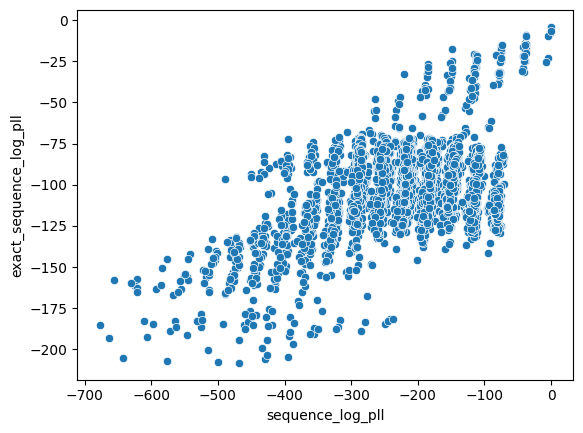

In [21]:
import seaborn as sns
sns.scatterplot(data=df, x='sequence_log_pll', y='exact_sequence_log_pll')


# get metrics


In [3]:
fdf = update_metrics.remote()
df = update_pll_metrics.remote()
fdf = fdf.merge(df, left_on='binder_sequence', right_on='sequence', how='left')
fdf['pae_interaction_rank'] = 1 - fdf['pae_interaction'].rank(pct=True)
fdf['i_ptm_rank'] = fdf['i_ptm'].rank(pct=True)
fdf['sequence_log_pll_rank'] = fdf['sequence_log_pll'].rank(pct=True)
fdf['fitness'] = (fdf['pae_interaction_rank'] + fdf['i_ptm_rank'] + fdf['sequence_log_pll_rank']) / 3
fdf = fdf.sort_values('fitness', ascending=False).reset_index(drop=True)
cols = [
    'seq_hash', 'binder_length', 'fitness', 'pae_interaction', 'i_ptm',  'sequence_log_pll',
      
       'pae_interaction_rank', 'i_ptm_rank',
       'sequence_log_pll_rank',
       'binder_plddt', 'binder_hydropathy','binder_pae',
        'ptm', 'binder_charged_fraction',
       'binder_hydrophobic_fraction',
       'binder_sequence',
]
results = fdf[cols].round(3)

In [2]:
len('NSDSECPLSHDGYCLHDGVCMYIEALDKYACNCVVGYIGERCQYRDLKWWELRGGEGGEGGEGGEGGEGGRGGEGGRGGEGGRGGEGGRGGEGGEGGRGGEGGEGGEGGEGGEGGRGGEGGRGGEGGRGGEGGRGGEGGEGGRGGEGGEGGEGGEGGEGGRGGEGGRGGEGGRGGEGGRGGEGGEGGRNSDSECPLSHDGYCLHDGVCMYIEALDKYACNCVVGYIGERCQYRDLKWWELR')

241

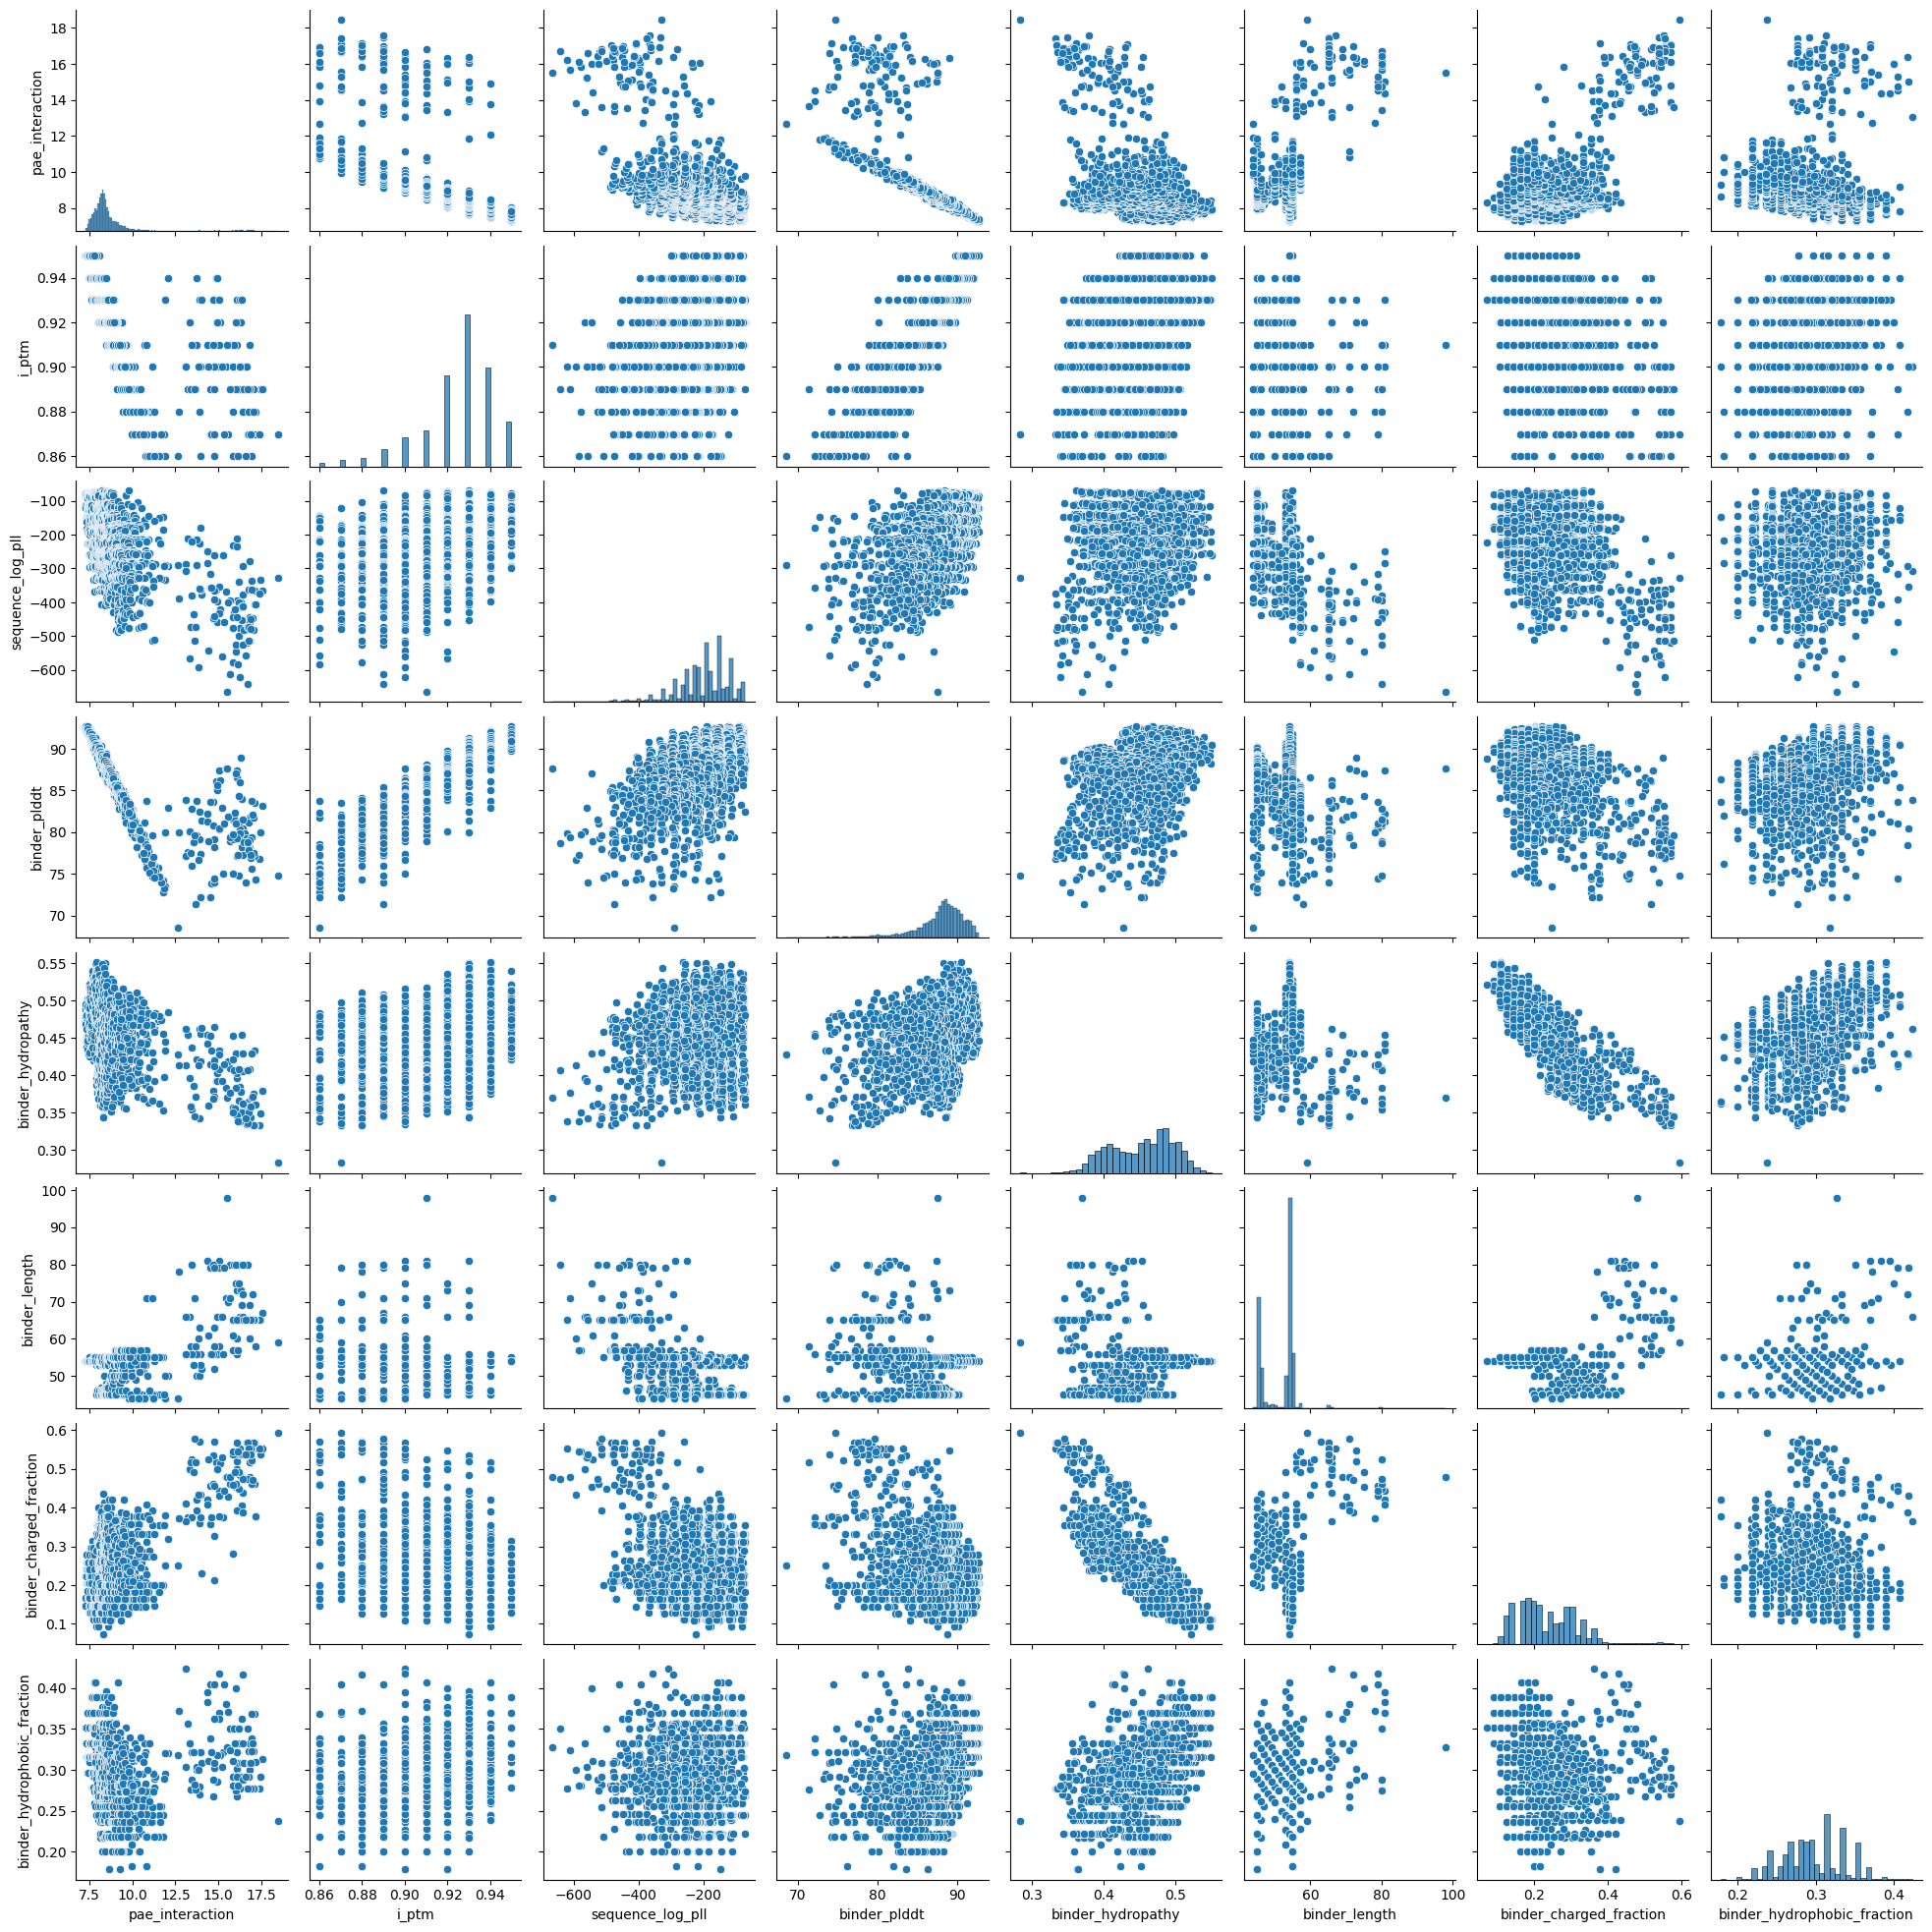

In [16]:
import seaborn as sns
sns.pairplot(results.query('i_ptm>0.85'), vars = [
    'pae_interaction', 'i_ptm', 'sequence_log_pll', 'binder_plddt', 
    'binder_hydropathy', 'binder_length', 'binder_charged_fraction', 'binder_hydrophobic_fraction'])

In [11]:
results.head(50)

,seq_hash,binder_length,fitness,pae_interaction,i_ptm,sequence_log_pll,pae_interaction_rank,i_ptm_rank,sequence_log_pll_rank,binder_plddt,binder_hydropathy,binder_pae,ptm,binder_charged_fraction,binder_hydrophobic_fraction,binder_sequence
0,990b70,54,0.981,7.306,0.95,-77.390,0.999,0.958,0.985,92.312,0.473,3.201,0.88,0.148,0.333,NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELD...
1,fbdde0,54,0.979,7.381,0.95,-77.957,0.996,0.958,0.982,92.108,0.468,3.241,0.88,0.167,0.333,NLFSNCPRRYRGICENNGSCQYAINLRTYTCQCLSGYTGARCQELD...
2,8a0800,54,0.978,7.387,0.95,-78.108,0.995,0.958,0.982,92.439,0.453,3.202,0.87,0.222,0.315,SLFSRCPKRYHGICNNNGQCRYAINLRTYTCICKSGYTGDRCQELD...
3,a82417,54,0.976,7.398,0.95,-78.886,0.994,0.958,0.977,92.360,0.456,3.203,0.87,0.222,0.315,SLFSRCPRRYHGICGNNGQCRYAINLRTYTCRCVSGYTGDRCQELD...
4,40c636,54,0.976,7.379,0.95,-79.445,0.996,0.958,0.974,92.007,0.458,3.244,0.88,0.148,0.315,NLFSNCPRRYRGICNNNGSCQYAINLRTYTCQCSSGYTGARCQELD...
5,da5758,54,0.976,7.431,0.95,-78.119,0.989,0.958,0.981,92.358,0.462,3.210,0.87,0.204,0.315,GLFSRCPKRYHGICGNNGQCRYAINLRTYTCRCVSGYTGPRCQELD...
6,bc7027,54,0.976,7.410,0.95,-78.711,0.992,0.958,0.978,91.879,0.464,3.272,0.87,0.148,0.315,NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCSSGYTGARCQELD...
7,29a580,54,0.976,7.428,0.95,-78.337,0.989,0.958,0.980,92.210,0.448,3.258,0.87,0.241,0.315,NLFSRCPKRYHGICENNGQCRYAINLRTYTCICDSGYTGDRCQELD...
8,0a8198,54,0.975,7.343,0.95,-80.472,0.998,0.958,0.969,92.536,0.439,3.172,0.87,0.259,0.315,SLFSRCPRRYHGICHNNGQCRYAINLRTYTCRCVSGYTGDRCQEKD...
9,7b52bb,54,0.975,7.310,0.95,-80.735,0.999,0.958,0.967,92.411,0.489,3.210,0.88,0.167,0.352,NLFSICPRRYRGICTNNGSCRYAINLRTYTCQCVSGYTGARCQELD...


In [17]:
results.head(20)['binder_sequence'].to_list()

['NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
 'NLFSNCPRRYRGICENNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
 'SLFSRCPKRYHGICNNNGQCRYAINLRTYTCICKSGYTGDRCQELDIRYLLLLN',
 'SLFSRCPRRYHGICGNNGQCRYAINLRTYTCRCVSGYTGDRCQELDIRYLLLLN',
 'NLFSNCPRRYRGICNNNGSCQYAINLRTYTCQCSSGYTGARCQELDIRYLLLLY',
 'GLFSRCPKRYHGICGNNGQCRYAINLRTYTCRCVSGYTGPRCQELDIRYLLLLN',
 'NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCSSGYTGARCQELDIRYLLLLY',
 'NLFSRCPKRYHGICENNGQCRYAINLRTYTCICDSGYTGDRCQELDIRYLLLLN',
 'SLFSRCPRRYHGICHNNGQCRYAINLRTYTCRCVSGYTGDRCQEKDIRYLLLLY',
 'NLFSICPRRYRGICTNNGSCRYAINLRTYTCQCVSGYTGARCQELDIRYLLLLY',
 'SLFSRCPKRYHGICNNNGQCRYAINLRTYTCICVSGYTGDRCQELDIRYLLLLN',
 'GLFSRCPKRYHGICGNNGQCRYAINLRTYTCRCVSGYTGDRCQELDIRYLLLLN',
 'SLFSRCPYRYHGICNNNGQCRYAINLRTYTCICVSGYTGDRCQELDIRYLLLLN',
 'ELFSRCPKRYHGICGNNGQCRYAINLRTYTCRCVSGYTGDRCQELDIRYLLLLN',
 'NLFSRCPKRYHGICGNNGQCRYAIHLRTGTCRCVSGYTGRRCQELDIRYLLLLY',
 'SLFSRCPRRYYGICGNNGLCKYAINLRTGTCRCVSGYTGDRCQELDIRYLLLLN',
 'NLFSKCPRRYYGICGNNGRCKYAINLRTYTCRCVSGYTGQRCQEKDIRYLLLLN

# look at evo results

In [8]:
from egfr_binder_rd2.utils import load_evolution_metadata
import pandas as pd
import seaborn as sns
from pathlib import Path

In [9]:
def load_evolution_results(evolution_dir: Path = Path('/home/naka/code/egfr_binder_rd2/data/evolution_trajectories')) -> pd.DataFrame:
    """
    Load and combine results from directed evolution runs.
    
    Args:
        evolution_dir (Path, optional): Directory containing evolution results. 
            Defaults to DATA_DIR / "evolution_trajectories"
            
    Returns:
        pd.DataFrame: Combined DataFrame with evolution metrics and metadata
    """
    
    evolution_dir = Path(evolution_dir)
    # Load all evolution metadata files
    all_results = []
    
    for metadata_file in evolution_dir.glob("*/metadata.json"):
        try:
            # Load metadata
            metadata = load_evolution_metadata(metadata_file)
            run_dir = metadata_file.parent
            
            # Load metrics from CSV files if they exist
            metrics_path = run_dir / "metrics.csv"
            if metrics_path.exists():
                df = pd.read_csv(metrics_path)
                
                # Add metadata columns
                df["run_id"] = run_dir.name
                df["start_time"] = metadata.start_time
                df["expert_configs"] = str(metadata.expert_configs)
                df["parent_sequences"] = str(metadata.parent_sequences)
                
                all_results.append(df)
                
        except Exception as e:
            print(f"Error processing {metadata_file}: {str(e)}")
            continue
    
    if not all_results:
        return pd.DataFrame()
    
    # Combine all results
    combined_df = pd.concat(all_results, ignore_index=True)
    
    # Calculate additional metrics if needed
    if "fitness" not in combined_df.columns:
        combined_df["pae_interaction_rank"] = 1 - combined_df["pae_interaction"].rank(pct=True)
        combined_df["i_ptm_rank"] = combined_df["i_ptm"].rank(pct=True)
        combined_df["sequence_log_pll_rank"] = combined_df["sequence_log_pll"].rank(pct=True)
        combined_df["fitness"] = (
            combined_df["pae_interaction_rank"] + 
            combined_df["i_ptm_rank"] + 
            combined_df["sequence_log_pll_rank"]
        ) / 3
    
    # Sort by fitness and generation
    combined_df = combined_df.sort_values(
        ["run_id", "generation", "fitness"], 
        ascending=[True, True, False]
    ).reset_index(drop=True)
    
    return combined_df

def get_best_sequences(df: pd.DataFrame, top_k: int = 10) -> pd.DataFrame:
    """
    Get the top-k sequences across all evolution runs based on fitness.
    
    Args:
        df (pd.DataFrame): DataFrame from load_evolution_results
        top_k (int): Number of top sequences to return
        
    Returns:
        pd.DataFrame: Top-k sequences with their metrics
    """
    cols = [
        "run_id", "generation", "binder_sequence", "fitness",
        "pae_interaction", "i_ptm", "sequence_log_pll",
        "binder_plddt", "binder_length"
    ]
    
    return df[cols].sort_values("fitness", ascending=False).head(top_k)

In [10]:
load_evolution_results('/home/naka/code/egfr_binder_rd2/data/evolution_trajectories')

""


In [34]:
metadata = load_evolution_metadata(Path('/home/naka/code/egfr_binder_rd2/data/evolution_trajectories/evolution_2024-11-03T18:58:40.235714.json'))


In [35]:
all_top_seqs = []
for gen in metadata.generation_metrics:
    _df = pd.DataFrame(gen['top_sequences'])
    _df['generation'] = gen['generation']
    all_top_seqs.append(_df)

all_top_seqs = pd.concat(all_top_seqs, ignore_index=True)





<Axes: xlabel='generation', ylabel='ipae'>

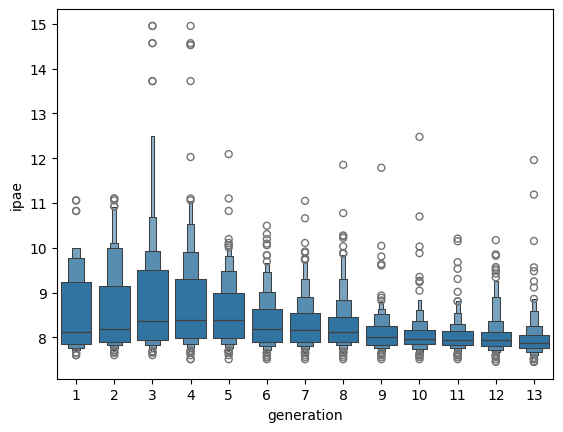

In [38]:
sns.boxenplot(data=all_top_seqs, x='generation', y='ipae')

<Axes: xlabel='generation', ylabel='iptm'>

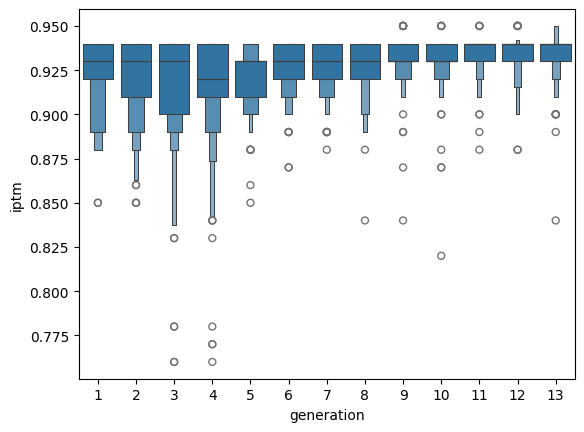

In [39]:
sns.boxenplot(data=all_top_seqs, x='generation', y='iptm')

<Axes: xlabel='generation', ylabel='pll'>

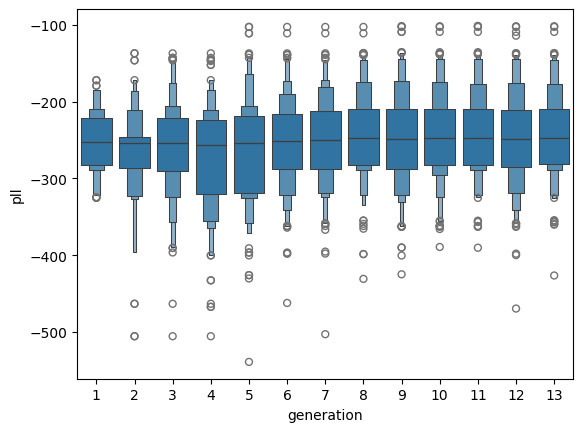

In [40]:
sns.boxenplot(data=all_top_seqs, x='generation', y='pll')